<a href="https://colab.research.google.com/github/bluemoon-17/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9주차 수업

## 결측값 제거하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [4]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis=1)

""
0
1
2
3
4


In [6]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [7]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [8]:
df.dropna(subset = ['score'], axis=0)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [10]:
df.dropna(subset = ['score'], axis=1)

KeyError: ['score']

In [11]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [12]:
df_nomiss['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [13]:
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [14]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [15]:
df.score.mean()

np.float64(4.0)

In [16]:
df['score'].sum()

np.float64(16.0)

In [17]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [18]:
df = pd.DataFrame({'name' : ['Alfred', 'Batman', 'Catwoman'],
                   'toy' : [np.nan, 'Batmobile', 'Bullwhip'],
                   'born' : [np.nan, pd.Timestamp('1940-04-25'),
                             pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [19]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [20]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [21]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [22]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [23]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [24]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [25]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [26]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [27]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [28]:
df.dropna(subset = ['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [29]:
df.dropna(subset = ['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [30]:
df.dropna(subset = ['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [31]:
df1 = pd.DataFrame(index = ['row', 'row2', 'row3'])
df1

""
row
row2
row3


In [32]:
df1.empty

True

In [33]:
df2 = pd.DataFrame(columns = ['col', 'col2', 'col3'])
df2

,col,col2,col3


In [34]:
df2.empty

True

In [35]:
df3 = pd.DataFrame(index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2', 'col3'])
df3

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [36]:
df3.empty

False

In [37]:
df4 = pd.DataFrame(np.nan,
                   index = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df4

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [38]:
df4.empty

False

In [39]:
df5 = pd.DataFrame(2,
                   index = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df5

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


In [40]:
df5.empty

False

## 결측 값 대체

In [41]:
import os
os.system("git clone https://github.com/ai7dnn/data")

0

In [42]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [43]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [44]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [45]:
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


### 결측값 채워넣기 fillna()

In [46]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [47]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [48]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [49]:
pd.set_option('display.precision', 2)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [51]:
exam.math.isna().sum()

np.int64(0)

In [52]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [53]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [54]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [55]:
df['sex'].value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [56]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [57]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [58]:
df['score'].value_counts().sort_values()

,count
score,
5,1
3,1
2,1
6,1
4,2


In [59]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [60]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [61]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [62]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [63]:
df.dropna(subset = ['sex', 'score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [66]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [67]:
df = pd.DataFrame([1])
df

,0
0,1


In [68]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [69]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

,0,1,2,3
0,1,1,2,2


In [70]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [71]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [72]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)
df

DTypePromotionError: The DType <class 'numpy.dtypes.StrDType'> could not be promoted by <class 'numpy.dtypes._PyFloatDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

In [73]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', None)
df

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [74]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      2 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [76]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [77]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [78]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [79]:
df = df.fillna(10)
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [81]:
type(df.loc[2, 'x2'])

int

In [82]:
type(df.loc[0, 'x2'])

str

In [83]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
83,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup
14,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact
152,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv


In [84]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [85]:
# %config InlineBackend.figure_format = 'retina

In [86]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


<Axes: xlabel='hwy'>

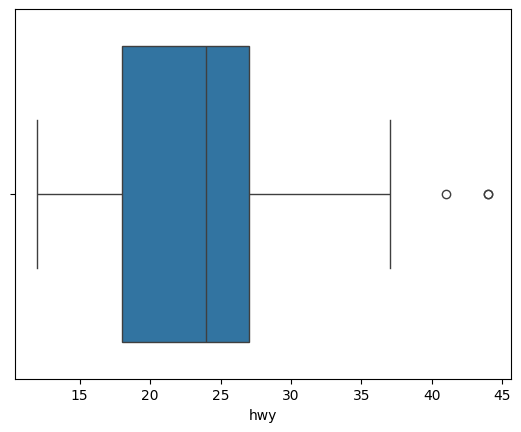

In [87]:
sns.boxplot(data = mpg, x = 'hwy')

### 박스상자의 구성요소

In [88]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [89]:
s.quantile()

np.float64(3.0)

In [90]:
s.quantile(.5)

np.float64(3.0)

In [91]:
s.quantile([.1, .2, .25, .5, .75])

,0
0.10,1.4
0.20,1.8
0.25,2.0
0.50,3.0
0.75,4.0


In [92]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [93]:
mpg.hwy.quantile([.25, .5, .75])

,hwy
0.25,18.0
0.50,24.0
0.75,27.0


In [94]:
a, b = [10, 20]

In [95]:
a

10

In [96]:
b

20

In [97]:
p25, p50, p75 = mpg.hwy.quantile([.25, .5, .75])

In [98]:
p25

18.0

In [99]:
p50

24.0

In [100]:
p75

27.0

In [101]:
iqr = p75 - p25
iqr

9.0

In [103]:
# upper fence
UF = p75 + 1.5 * iqr
UF

40.5

In [104]:
# lower fence
LF = p25 - 1.5 * iqr
LF

4.5

In [105]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [107]:
mpg.hwy.describe()['50%']

np.float64(24.0)

In [108]:
mpg[ mpg.hwy > UF ][['hwy']]

,hwy
212,44
221,44
222,41


In [109]:
mpg[ mpg.hwy > UF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [110]:
mpg[ mpg.hwy < LF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [111]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [112]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [113]:
mpg[ (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [114]:
mpg[ (mpg['hwy'] < LF) | (mpg['hwy'] > UF) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [115]:
mpg['hwy'] = np.where((mpg.hwy < LF) | (mpg.hwy > UF), np.nan, mpg['hwy'])
mpg.hwy.isna().sum()

np.int64(3)

In [116]:
mpg[ mpg.hwy.isna() ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [117]:
len(mpg)

234

In [118]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [119]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [120]:
mpg.groupby('drv').agg(mean_hwy = ('hwy' , 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [121]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [122]:
mpg[ (mpg['hwy'] < LF) | (mpg['hwy'] > UF) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


# END